In [1]:
# importamos las librerías necesarias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import ast
warnings.filterwarnings('ignore')

In [12]:
# vemos una primera linea del archivo, observamos datos anidados en la columna items
{'user_id': '76561198030389591', 
 'items_count': 12, 
 'steam_id': '76561198030389591', 
 'user_url': 'http://steamcommunity.com/profiles/76561198030389591', 
 'items': [{'item_id': '205790', 'item_name': 'Dota 2 Test', 'playtime_forever': 0, 'playtime_2weeks': 0}, 
           {'item_id': '96800', 'item_name': 'Nexuiz', 'playtime_forever': 19, 'playtime_2weeks': 0}, 
           {'item_id': '216370', 'item_name': 'Nexuiz Beta', 'playtime_forever': 7, 'playtime_2weeks': 0}, 
           {'item_id': '225760', 'item_name': 'Nexuiz STUPID Mode', 'playtime_forever': 1, 'playtime_2weeks': 0}, 
           {'item_id': '730', 'item_name': 'Counter-Strike: Global Offensive', 'playtime_forever': 95003, 'playtime_2weeks': 941}, 
           {'item_id': '51100', 'item_name': 'Tactical Intervention', 'playtime_forever': 4840, 'playtime_2weeks': 0}, 
           {'item_id': '113400', 'item_name': 'APB Reloaded', 'playtime_forever': 123, 'playtime_2weeks': 0}, 
           {'item_id': '271290', 'item_name': 'HAWKEN', 'playtime_forever': 0, 'playtime_2weeks': 0}, 
           {'item_id': '91310', 'item_name': 'Dead Island', 'playtime_forever': 10, 'playtime_2weeks': 0}, 
           {'item_id': '216250', 'item_name': 'Dead Island Riptide', 'playtime_forever': 108, 'playtime_2weeks': 0}, 
           {'item_id': '346330', 'item_name': 'BrainBread 2', 'playtime_forever': 33, 'playtime_2weeks': 0}, 
           {'item_id': '372000', 'item_name': 'Tree of Savior (English Ver.)', 'playtime_forever': 491, 'playtime_2weeks': 0}]}

{'user_id': '76561198030389591',
 'items_count': 12,
 'steam_id': '76561198030389591',
 'user_url': 'http://steamcommunity.com/profiles/76561198030389591',
 'items': [{'item_id': '205790',
   'item_name': 'Dota 2 Test',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '96800',
   'item_name': 'Nexuiz',
   'playtime_forever': 19,
   'playtime_2weeks': 0},
  {'item_id': '216370',
   'item_name': 'Nexuiz Beta',
   'playtime_forever': 7,
   'playtime_2weeks': 0},
  {'item_id': '225760',
   'item_name': 'Nexuiz STUPID Mode',
   'playtime_forever': 1,
   'playtime_2weeks': 0},
  {'item_id': '730',
   'item_name': 'Counter-Strike: Global Offensive',
   'playtime_forever': 95003,
   'playtime_2weeks': 941},
  {'item_id': '51100',
   'item_name': 'Tactical Intervention',
   'playtime_forever': 4840,
   'playtime_2weeks': 0},
  {'item_id': '113400',
   'item_name': 'APB Reloaded',
   'playtime_forever': 123,
   'playtime_2weeks': 0},
  {'item_id': '271290',
   'item_name': 'HAWK

In [2]:
# guardamos la ruta del archivo en una variable
users_items = '../Datasets/australian_users_items.json'

In [3]:
# creamos una funión para leer el archivo Json

def read_json_file(file_path):
    try:
        data_list = []

        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.strip()
                try:
                    line_data = ast.literal_eval(line)
                    data_list.append(line_data)
                except (SyntaxError, ValueError) as e:
                    print(f"Error al evaluar la línea '{line}': {e}")

        if not data_list:
            raise ValueError("El archivo JSON está vacío o no contiene datos válidos.")

        df = pd.json_normalize(data_list, 'items', ['user_id', 'items_count', 'steam_id', 'user_url'])

        return df

    except FileNotFoundError:
        print(f"Error: El archivo '{file_path}' no se encontró.")
    except Exception as e:
        print(f"Error inesperado: {e}")


In [4]:
# generamos un dataframe aplicando la función anterior
df_users_items = read_json_file(users_items)

In [5]:
df_users_items.head()       # vemos las primeras líneas del archivo

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,items_count,steam_id,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


In [6]:
# la columna 'user_url' no la cargamos, ya que no serán de utilidad
df_users_items = df_users_items[['user_id', 'steam_id', 'playtime_forever', 'playtime_2weeks', 'item_id', 'item_name', 'items_count']]

In [7]:
df_users_items.info()           # vemos información del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   steam_id          object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   item_id           object
 5   item_name         object
 6   items_count       object
dtypes: int64(2), object(5)
memory usage: 275.2+ MB


In [8]:
df_users_items.isna().sum()*100 / len(df_users_items)       # vemos la cantidad de nulos

user_id             0.0
steam_id            0.0
playtime_forever    0.0
playtime_2weeks     0.0
item_id             0.0
item_name           0.0
items_count         0.0
dtype: float64

In [9]:
df_users_items.replace('', np.NaN, inplace= True)           # reemplazamos por np.nan
df_users_items.replace(' ', np.NaN, inplace= True)

In [10]:
df_users_items.isna().sum()*100 / len(df_users_items)       # vemos que no hay nulos luego del reemplazo

user_id             0.0
steam_id            0.0
playtime_forever    0.0
playtime_2weeks     0.0
item_id             0.0
item_name           0.0
items_count         0.0
dtype: float64

In [11]:
df_users_items['item_id'] = df_users_items['item_id'].astype(int)       # convertimos a tipo de dato entero


In [12]:
df_users_items[df_users_items['steam_id'] == 'js41637']                 # vemos que steam id es un id distinto de usuario

,user_id,steam_id,playtime_forever,playtime_2weeks,item_id,item_name,items_count


In [13]:
# vemos que user_id es la clave primaria de id de usuario, por lo tanto steam_id no será de utilidad y la removemos del dataframe
df_users_items.drop(columns= 'steam_id', inplace= True)

In [14]:
# vemos los datos duplicados:
df_users_items.duplicated().sum()

59104

In [15]:
# borramos los datos duplicados:
df_users_items.drop_duplicates(inplace= True)

In [16]:
df_users_items.head()

,user_id,playtime_forever,playtime_2weeks,item_id,item_name,items_count
0,76561197970982479,6,0,10,Counter-Strike,277
1,76561197970982479,0,0,20,Team Fortress Classic,277
2,76561197970982479,7,0,30,Day of Defeat,277
3,76561197970982479,0,0,40,Deathmatch Classic,277
4,76561197970982479,0,0,50,Half-Life: Opposing Force,277


In [17]:
df_users_items['playtime_forever'].value_counts()           # Los valores de tiempo de juego están expresados en minutos

playtime_forever
0        1847730
1         101586
2          34391
3          31530
4          29127
          ...   
76541          1
64676          1
53328          1
44029          1
34753          1
Name: count, Length: 48861, dtype: int64

In [18]:
df_users_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5094105 entries, 0 to 5153208
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   playtime_forever  int64 
 2   playtime_2weeks   int64 
 3   item_id           int32 
 4   item_name         object
 5   items_count       object
dtypes: int32(1), int64(2), object(3)
memory usage: 252.6+ MB


In [19]:
# vemos la distribución de playtime forever y playtime 2weeks
df_users_items[['playtime_forever', 'playtime_2weeks']].describe()          

,playtime_forever,playtime_2weeks
count,5.094105e+06,5.094105e+06
mean,9.905511e+02,9.069004e+00
std,5.414297e+03,1.403145e+02
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,3.400000e+01,0.000000e+00
75%,3.550000e+02,0.000000e+00
max,6.427730e+05,1.996700e+04


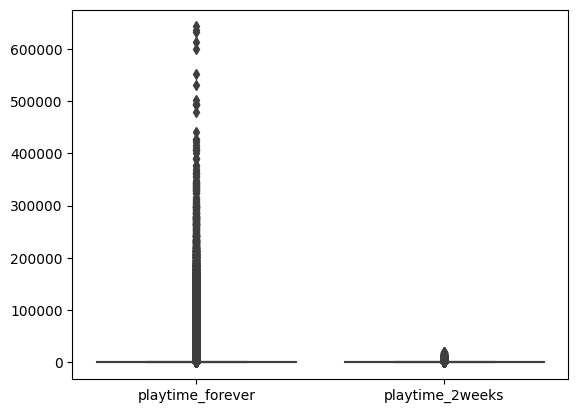

In [20]:
sns.boxplot(df_users_items[['playtime_forever', 'playtime_2weeks']]);

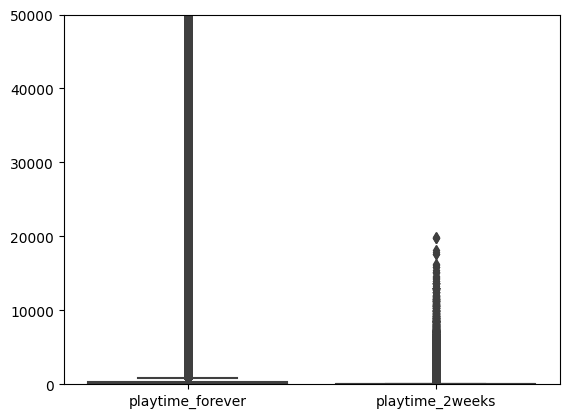

In [32]:
sns.boxplot(df_users_items[['playtime_forever', 'playtime_2weeks']])
plt.ylim(0,50000);

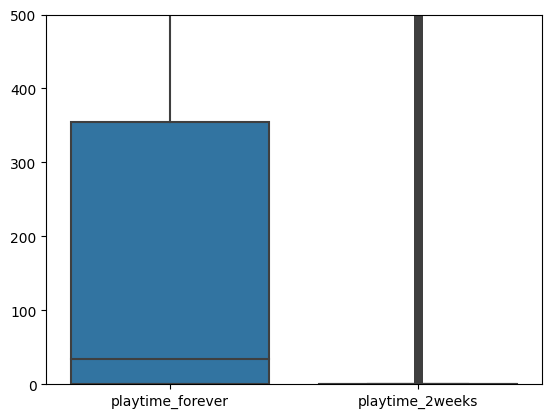

In [33]:
sns.boxplot(df_users_items[['playtime_forever', 'playtime_2weeks']])
plt.ylim(0,500);

(0.0, 500.0)

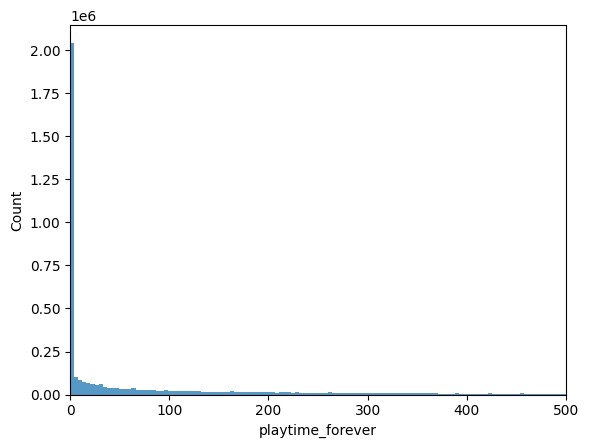

In [34]:
sns.histplot(df_users_items['playtime_forever'])
plt.xlim(0,500)

In [35]:
# los valores 0 en ambas columnas (playtime forever y playtime 2weeks) los dejamos, ya que será de utilidad en la cosntrucción de 
# user features

In [21]:
df_users_items.head()

,user_id,playtime_forever,playtime_2weeks,item_id,item_name,items_count
0,76561197970982479,6,0,10,Counter-Strike,277
1,76561197970982479,0,0,20,Team Fortress Classic,277
2,76561197970982479,7,0,30,Day of Defeat,277
3,76561197970982479,0,0,40,Deathmatch Classic,277
4,76561197970982479,0,0,50,Half-Life: Opposing Force,277


In [25]:
df = df_users_items[['user_id', 'playtime_forever', 'playtime_2weeks', 'items_count']]     # generamos un dataframe con features de usuario
df = df.groupby('user_id').agg(sum)
df.reset_index(inplace=True)

In [26]:
df.head()

,user_id,playtime_forever,playtime_2weeks,items_count
0,--000--,141027,2274,3364
1,--ace--,70382,0,1936
2,--ionex--,48084,599,529
3,-2SV-vuLB-Kg,54249,0,4624
4,-404PageNotFound-,231260,0,22201


In [27]:
len(df)

70912

In [28]:
df.duplicated().sum()

0

In [29]:
df['playtime_forever'].max()                # vemos el máximo tiempo de juego

4660393

In [30]:
df['playtime_forever'].idxmax()             # vemos el idx de tiempo máximo de juego

52202

In [31]:
df.loc[52202]                      # vemos los tiempos de juego del usuario de tiempo máximo

user_id             REBAS_AS_F-T
playtime_forever         4660393
playtime_2weeks           223199
items_count              3876961
Name: 52202, dtype: object

In [44]:
df['playtime_forever'].value_counts()

playtime_forever
0        2509
1         140
2          42
3          32
12         30
         ... 
24750       1
34457       1
3831        1
68342       1
61587       1
Name: count, Length: 53201, dtype: int64

In [34]:
df_users_items.to_parquet('../CleanData/users_items.parquet')           # exportamos en un parquet la información completa

In [35]:
df.to_parquet('../CleanData/users_features.parquet')                    # exportamos en un parquet las features de usuario

In [36]:
# generamos un dataframe con features de item
df_items = df_users_items[['item_id', 'playtime_forever', 'playtime_2weeks']]
df_items = df_items.groupby('item_id').agg(sum)
df_items.reset_index(inplace=True)
df_items.head()

,item_id,playtime_forever,playtime_2weeks
0,10,17107858,46656
1,20,960524,14117
2,30,756375,14042
3,40,154424,38
4,50,726545,2485


In [38]:
df_items[df_items['playtime_forever'] == 0]             # vemos los juegos que no han sido jugados por los usuarios

,item_id,playtime_forever,playtime_2weeks
26,1210,0,0
33,1320,0,0
81,2680,0,0
169,4400,0,0
170,4410,0,0
...,...,...,...
10968,527520,0,0
10973,528580,0,0
10975,529670,0,0
10976,529820,0,0


In [37]:
df_items.duplicated().sum()                         # verificamos que no hay items duplicados

0

In [40]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10978 entries, 0 to 10977
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   item_id           10978 non-null  int32
 1   playtime_forever  10978 non-null  int64
 2   playtime_2weeks   10978 non-null  int64
dtypes: int32(1), int64(2)
memory usage: 214.5 KB


In [52]:
df_items.to_parquet('../Recommender System/item_item_features.parquet')     # exportamos en parquet